<a href="https://colab.research.google.com/github/Juethro/DataQuest_2023_NewQuest/blob/dimyadi/NEWQUEST_IKN_WEATHER_FORECASTING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download Data and Load Library

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files

# Unggah file konfigurasi Kaggle API (kaggle.json)
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"dimyadisuhartono","key":"763ff78576baff71a6429128f51ab0d1"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c tahap-penyisihan-oq-dataquestua

tahap-penyisihan-oq-dataquestua.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip -q tahap-penyisihan-oq-dataquestua.zip -d datasets

replace datasets/sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace datasets/test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace datasets/train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y


In [ ]:
# Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer

In [ ]:
train_df = pd.read_csv('datasets/train.csv')
train_df.head()

,datetime,datetime_iso,time-zone,temp,visibility,d_point,feels,min_temp,max_temp,prssr,sea_level,grnd_level,hum,wind_spd,wind_deg,rain_1h,rain_3h,snow_1h,snow_3h,clouds
0,283996800,1979-01-01 00:00:00+00:00,28800,24.75 Celcius,NaN,23.89 C,25.76 C,24.28,25.22°C,1012,undetermined,NaN,95,0.82,320.0 °,zero,0,NaN,NaN,100
1,284000400,1979-01-01 01:00:00+00:00,28800,24.58 C,NaN,23.73 C,25.57 C,23.99 C,25.26 C,1012,NaN,NaN,95,0.96 m/s,338.0°,0,0,0,0,100
2,284004000,1979-01-01 02:00:00+00:00,28800,26.6 Celcius,unidentified,24.06 C,26.6 C,26.1 C,27.39,1012,NaN,undetermined,86,1.22 m/s,339.0°,0,volume:zero,NaN,NaN,99
3,284007600,1979-01-01 03:00:00+00:00,28800,27.31 Celcius,NaN,24.37 C,30.9 C,26.59,28.36 C,1012,NaN,undetermined,84,1.08 m/s,342,0.13,nol,0,NaN,94
4,284011200,1979-01-01 04:00:00+00:00,28800,27.41,NaN,25.05 C,31.54 C,26.58 C,28.31 °C,1011,NaN,undetermined,87,0.86,336.0°,0.34,nol,NaN,0,100


# Statistika Deskriptif

In [ ]:
#Tipe data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341880 entries, 0 to 341879
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   datetime      341880 non-null  int64 
 1   datetime_iso  341880 non-null  object
 2   time-zone     341880 non-null  int64 
 3   temp          341880 non-null  object
 4   visibility    51112 non-null   object
 5   d_point       341880 non-null  object
 6   feels         341880 non-null  object
 7   min_temp      341880 non-null  object
 8   max_temp      341880 non-null  object
 9   prssr         341880 non-null  object
 10  sea_level     192964 non-null  object
 11  grnd_level    192919 non-null  object
 12  hum           341880 non-null  object
 13  wind_spd      341880 non-null  object
 14  wind_deg      341880 non-null  object
 15  rain_1h       341880 non-null  object
 16  rain_3h       192329 non-null  object
 17  snow_1h       192696 non-null  object
 18  snow_3h       192699 non

In [ ]:
len(train_df)

341880

In [ ]:
#Statistika Deskriptif
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
datetime,341880.0,899379000.0,3.552926e+08,283996800.0,591687900.0,899379000.0,1.207070e+09,1.514761e+09
time-zone,341880.0,28800.0,0.000000e+00,28800.0,28800.0,28800.0,2.880000e+04,2.880000e+04


# Data Preprocessing

In [ ]:
columns_to_clean = ['temp', 'd_point', 'feels', 'min_temp', 'max_temp', 'prssr', 'hum', 'wind_spd', 'wind_deg', 'clouds', 'rain_1h']

# Fungsi untuk membersihkan data
def clean_numeric_data(df, column):
    # Menghapus semua karakter selain angka, desimal, dan tanda minus
    df[column] = df[column].str.replace('[^0-9.-]+', '', regex=True)
    # Mengonversi kolom menjadi tipe data numerik (float)
    df[column] = pd.to_numeric(df[column], errors='coerce')

# Membersihkan data pada variabel yang ditentukan
for column in columns_to_clean:
    clean_numeric_data(train_df, column)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341880 entries, 0 to 341879
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   datetime      341880 non-null  int64  
 1   datetime_iso  341880 non-null  object 
 2   time-zone     341880 non-null  int64  
 3   temp          341880 non-null  float64
 4   visibility    51112 non-null   object 
 5   d_point       341880 non-null  float64
 6   feels         341880 non-null  float64
 7   min_temp      341880 non-null  float64
 8   max_temp      341880 non-null  float64
 9   prssr         316590 non-null  float64
 10  sea_level     192964 non-null  object 
 11  grnd_level    192919 non-null  object 
 12  hum           341880 non-null  float64
 13  wind_spd      341880 non-null  float64
 14  wind_deg      341880 non-null  float64
 15  rain_1h       315282 non-null  float64
 16  rain_3h       192329 non-null  object 
 17  snow_1h       192696 non-null  object 
 18  snow

In [ ]:
train_df.head(20)

,datetime,datetime_iso,time-zone,temp,visibility,d_point,feels,min_temp,max_temp,prssr,sea_level,grnd_level,hum,wind_spd,wind_deg,rain_1h,rain_3h,snow_1h,snow_3h,clouds
0,283996800,1979-01-01 00:00:00+00:00,28800,24.75,NaN,23.89,25.76,24.28,25.22,1012.0,undetermined,NaN,95.00,0.82,320.0,NaN,0,NaN,NaN,100.0
1,284000400,1979-01-01 01:00:00+00:00,28800,24.58,NaN,23.73,25.57,23.99,25.26,1012.0,NaN,NaN,95.00,0.96,338.0,0.00,0,0,0,100.0
2,284004000,1979-01-01 02:00:00+00:00,28800,26.60,unidentified,24.06,26.60,26.10,27.39,1012.0,NaN,undetermined,86.00,1.22,339.0,0.00,volume:zero,NaN,NaN,99.0
3,284007600,1979-01-01 03:00:00+00:00,28800,27.31,NaN,24.37,30.90,26.59,28.36,1012.0,NaN,undetermined,84.00,1.08,342.0,0.13,nol,0,NaN,94.0
4,284011200,1979-01-01 04:00:00+00:00,28800,27.41,NaN,25.05,31.54,26.58,28.31,1011.0,NaN,undetermined,87.00,0.86,336.0,0.34,nol,NaN,0,100.0
5,284014800,1979-01-01 05:00:00+00:00,28800,28.08,NaN,24.92,32.79,27.36,29.40,1010.0,NaN,NaN,83.00,0.84,7.0,3.33,NaN,NaN,NaN,100.0
6,284018400,1979-01-01 06:00:00+00:00,28800,28.68,NaN,24.25,33.29,27.62,31.02,1010.0,undetermined,undetermined,77.00,0.82,309.0,8.01,volume:zero,nol,no-snow,100.0
7,284022000,1979-01-01 07:00:00+00:00,28800,28.62,NaN,25.85,34.70,28.12,29.35,1010.0,NaN,not recorded,85.00,0.71,291.0,2.54,NaN,NaN,0,95.0
8,284025600,1979-01-01 08:00:00+00:00,28800,26.55,NaN,24.21,26.55,26.09,26.83,1009.0,undetermined,undetermined,87.00,0.62,285.0,1.29,0,volume:zero,NaN,97.0
9,284029200,1979-01-01 09:00:00+00:00,28800,26.38,NaN,24.97,26.38,25.68,29.02,1009.0,NaN,undetermined,92.00,0.44,294.0,0.39,0,NaN,0,92.0


In [ ]:
train_df.isna().sum()

datetime             0
datetime_iso         0
time-zone            0
temp                 0
visibility      290768
d_point              0
feels                0
min_temp             0
max_temp             0
prssr            25290
sea_level       148916
grnd_level      148961
hum                  0
wind_spd             0
wind_deg             0
rain_1h          26598
rain_3h         149551
snow_1h         149184
snow_3h         149181
clouds               0
dtype: int64

## Hapus variabel inkonsisten

In [ ]:
# Daftar kolom yang ingin dihapus
columns_to_drop = ['datetime', 'visibility', 'sea_level', 'grnd_level', 'rain_3h', 'snow_1h', 'snow_3h', 'time-zone']

# Menggunakan metode drop untuk menghapus kolom-kolom tersebut
train_df.drop(columns=columns_to_drop, inplace=True)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341880 entries, 0 to 341879
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   datetime_iso  341880 non-null  object 
 1   temp          341880 non-null  float64
 2   d_point       341880 non-null  float64
 3   feels         341880 non-null  float64
 4   min_temp      341880 non-null  float64
 5   max_temp      341880 non-null  float64
 6   prssr         316590 non-null  float64
 7   hum           341880 non-null  float64
 8   wind_spd      341880 non-null  float64
 9   wind_deg      341880 non-null  float64
 10  rain_1h       315282 non-null  float64
 11  clouds        341880 non-null  float64
dtypes: float64(11), object(1)
memory usage: 31.3+ MB


## EDA

array([[<Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'd_point'}>,
        <Axes: title={'center': 'feels'}>],
       [<Axes: title={'center': 'min_temp'}>,
        <Axes: title={'center': 'max_temp'}>,
        <Axes: title={'center': 'prssr'}>],
       [<Axes: title={'center': 'hum'}>,
        <Axes: title={'center': 'wind_spd'}>,
        <Axes: title={'center': 'wind_deg'}>],
       [<Axes: title={'center': 'rain_1h'}>,
        <Axes: title={'center': 'clouds'}>, <Axes: >]], dtype=object)

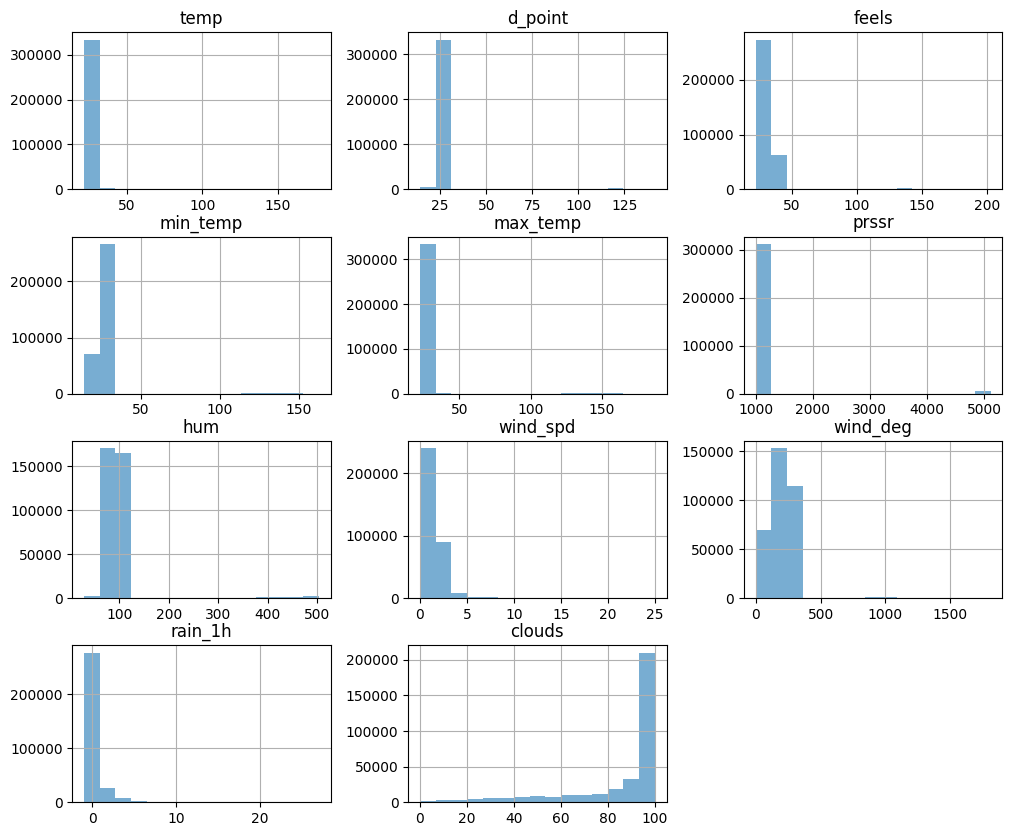

In [ ]:
train_df.hist(bins=15, figsize=(12,10), alpha=0.6, label=False)

In [ ]:
train_df.isna().sum()

datetime_iso        0
temp                0
d_point             0
feels               0
min_temp            0
max_temp            0
prssr           25290
hum                 0
wind_spd            0
wind_deg            0
rain_1h         26598
clouds              0
dtype: int64

## Imputasi

In [ ]:
def numeric_imputasi(data, kol_num):
    for kol in kol_num:
        X = data[[kol]].values
        # Mencari mean dan standar deviasi dari atribut
        means = np.nanmean(X, axis=0)
        stds = np.nanstd(X, axis=0)

        # Cek apakah terdistribusi secara normal
        is_normal = (np.abs((X - means) / stds) <= 2).all(axis=0)

        # Membuat percabangan
        if is_normal.all():
            imputer = SimpleImputer(strategy='mean')
        else:
            imputer = SimpleImputer(strategy='median')

        # Melakukan imputasi
        X_imputed = imputer.fit_transform(X)

        data[kol] = X_imputed
    return data

In [ ]:
# Kolom yang memiliki missing value
kol_num = ['prssr', 'rain_1h']

# Pemanggilan fungsi imputasi
numeric_imputasi(train_df, kol_num)

,datetime_iso,temp,d_point,feels,min_temp,max_temp,prssr,hum,wind_spd,wind_deg,rain_1h,clouds
0,1979-01-01 00:00:00+00:00,24.75,23.89,25.76,24.28,25.22,1012.0,95.0,0.82,320.0,0.00,100.0
1,1979-01-01 01:00:00+00:00,24.58,23.73,25.57,23.99,25.26,1012.0,95.0,0.96,338.0,0.00,100.0
2,1979-01-01 02:00:00+00:00,26.60,24.06,26.60,26.10,27.39,1012.0,86.0,1.22,339.0,0.00,99.0
3,1979-01-01 03:00:00+00:00,27.31,24.37,30.90,26.59,28.36,1012.0,84.0,1.08,342.0,0.13,94.0
4,1979-01-01 04:00:00+00:00,27.41,25.05,31.54,26.58,28.31,1011.0,87.0,0.86,336.0,0.34,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...
341875,2017-12-31 19:00:00+00:00,25.06,24.55,131.53,24.44,25.69,1007.0,97.0,0.90,13.0,0.00,99.0
341876,2017-12-31 20:00:00+00:00,24.51,24.17,25.58,23.89,25.13,1006.0,98.0,0.85,21.0,0.00,100.0
341877,2017-12-31 21:00:00+00:00,24.63,24.29,129.32,24.00,126.96,1007.0,98.0,1.54,26.0,0.00,97.0
341878,2017-12-31 22:00:00+00:00,26.68,24.71,29.76,25.02,27.25,1008.0,89.0,1.46,17.0,0.30,98.0


In [ ]:
train_df.isna().sum()

datetime_iso    0
temp            0
d_point         0
feels           0
min_temp        0
max_temp        0
prssr           0
hum             0
wind_spd        0
wind_deg        0
rain_1h         0
clouds          0
dtype: int64

# Modelling


In [ ]:
#Library for modelling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Pisahkan fitur (variabel independen) dan target (rain_1h) dari dataset
X = train_df.drop(columns=['rain_1h', 'datetime_iso'])
y = train_df['rain_1h']

In [ ]:
# Bagi data menjadi data pelatihan (train set) dan data pengujian (test set)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Inisialisasi model-model yang berbeda
# models = {
#     'Linear Regression': LinearRegression(),
#     'Ridge Regression': Ridge(alpha=1.0),
#     'Lasso Regression': Lasso(alpha=1.0),
#     'Random Forest Regressor': RandomForestRegressor(n_estimators=100, random_state=42),
#     'Gradient Boosting Regressor': GradientBoostingRegressor(n_estimators=100, random_state=42),
#     'Support Vector Regressor': SVR(kernel='linear'),
#     'XGBoost Regressor': XGBRegressor(objective='reg:squarederror', random_state=42)
# }

# # Latih dan evaluasi model-model tersebut
# for model_name, model in models.items():
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     rmse = mean_squared_error(y_test, y_pred, squared=False)
#     print(f'{model_name} - RMSE: {rmse}')


In [ ]:
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
rmse_xgb = mean_squared_error(y_test, y_pred_xgb, squared=False)
print(f'XGBoost- RMSE: {rmse_xgb}')

XGBoost- RMSE: 0.8840584964938891


In [ ]:
from sklearn.ensemble import VotingRegressor

# Inisialisasi model-model yang berbeda dalam bentuk list atau tuple
models = [
    ('Linear Regression', LinearRegression()),
    ('Ridge Regression', Ridge(alpha=1.0)),
    ('Lasso Regression', Lasso(alpha=1.0)),
    ('Random Forest Regressor', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('Gradient Boosting Regressor', GradientBoostingRegressor(n_estimators=100, random_state=42)),
    ('XGBoost Regressor', XGBRegressor(objective='reg:squarederror', random_state=42))
]

# Buat Voting Regressor
voting_regressor = VotingRegressor(estimators=models)

# Latih model Voting Regressor
voting_regressor.fit(X_train, y_train)

# Lakukan prediksi pada data pengujian
y_pred_vr = voting_regressor.predict(X_test)

# Hitung RMSE (Root Mean Square Error)
rmse_vote = mean_squared_error(y_test, y_pred_vr, squared=False)

# Tampilkan nilai RMSE
print(f'Voting Regressor - RMSE: {rmse_vote}')


Voting Regressor - RMSE: 0.8955567780392742


# Prediksi

In [ ]:
test_df = pd.read_csv('datasets/test.csv')
test_df.head()

,datetime,datetime_iso,time-zone,temp,visibility,d_point,feels,min_temp,max_temp,prssr,sea_level,grnd_level,hum,wind_spd,wind_deg,rain_3h,snow_1h,snow_3h,clouds
0,1514764800,2018-01-01 00:00:00+00:00,28800,26.59 °C,NaN,23.66,26.59,26.02,27.16,1009,NaN,undetermined,84,1.45 m/s,355,0,NaN,no_snow,97
1,1514768400,2018-01-01 01:00:00+00:00,28800,26.51 C,NaN,24.92,26.51 °C,26.06,28.04,1009,NaN,undetermined,91,1.67 m/s,351,0mm,no-snow,0 milimeter,95
2,1514772000,2018-01-01 02:00:00+00:00,28800,28.68 C,NaN,25.71,34.68,28.03 C,29.3 C,1009.0 hPa.,NaN,NaN,84,1.72 m/s,345.0°,0 mm,volume:zero,0,90
3,1514775600,2018-01-01 03:00:00+00:00,28800,28.84 C,NaN,25.25,34.51,28.52,29.08 °C,1008,NaN,NaN,81,1.49,339.0°,0 milimeter,0,NaN,91
4,1514779200,2018-01-01 04:00:00+00:00,28800,29.75 Celcius,,24.62,35.38,29.31 C,30.57,1007,undetermined,undetermined,74,1.39 m/s,339.0°,NaN,0,volume:0,96


In [ ]:
clean_test = ['temp', 'd_point', 'feels', 'min_temp', 'max_temp', 'prssr', 'hum', 'wind_spd', 'wind_deg', 'clouds']

# Membersihkan data pada variabel yang ditentukan
for column in clean_test:
    clean_numeric_data(test_df, column)

In [ ]:
# Mnggunakan metode drop untuk menghapus kolom-kolom tersebut
test_df.drop(columns=columns_to_drop, inplace=True)

In [ ]:
test_df.isna().sum()

datetime_iso       0
temp               0
d_point            1
feels              0
min_temp           0
max_temp           0
prssr           3531
hum                0
wind_spd           0
wind_deg           0
clouds             0
dtype: int64

In [ ]:
# Kolom yang memiliki missing value
test_imp = ['prssr', 'd_point']

# Pemanggilan fungsi imputasi
numeric_imputasi(test_df, test_imp)

,datetime_iso,temp,d_point,feels,min_temp,max_temp,prssr,hum,wind_spd,wind_deg,clouds
0,2018-01-01 00:00:00+00:00,26.59,23.66,26.59,26.02,27.16,1009.0,84.0,1.45,355.0,97.0
1,2018-01-01 01:00:00+00:00,26.51,24.92,26.51,26.06,28.04,1009.0,91.0,1.67,351.0,95.0
2,2018-01-01 02:00:00+00:00,28.68,25.71,34.68,28.03,29.30,1010.0,84.0,1.72,345.0,90.0
3,2018-01-01 03:00:00+00:00,28.84,25.25,34.51,28.52,29.08,1008.0,81.0,1.49,339.0,91.0
4,2018-01-01 04:00:00+00:00,29.75,24.62,35.38,29.31,30.57,1007.0,74.0,1.39,339.0,96.0
...,...,...,...,...,...,...,...,...,...,...,...
49363,2023-08-19 19:00:00+00:00,24.37,23.34,25.32,22.70,28.20,1011.0,94.0,1.57,239.0,84.0
49364,2023-08-19 20:00:00+00:00,23.87,23.02,24.79,21.91,28.01,1011.0,95.0,1.53,235.0,70.0
49365,2023-08-19 21:00:00+00:00,23.87,23.02,24.79,21.91,28.01,1011.0,95.0,1.53,235.0,70.0
49366,2023-08-19 22:00:00+00:00,23.87,23.02,24.79,21.91,28.01,1011.0,95.0,1.53,235.0,70.0


In [ ]:
test_df.drop(columns=['datetime_iso'], inplace = True)

KeyError: ignored

In [ ]:
test_df.head()

,datetime_iso,temp,d_point,feels,min_temp,max_temp,prssr,hum,wind_spd,wind_deg,clouds
0,2018-01-01 00:00:00+00:00,26.59,23.66,26.59,26.02,27.16,1009.0,84.0,1.45,355.0,97.0
1,2018-01-01 01:00:00+00:00,26.51,24.92,26.51,26.06,28.04,1009.0,91.0,1.67,351.0,95.0
2,2018-01-01 02:00:00+00:00,28.68,25.71,34.68,28.03,29.30,1010.0,84.0,1.72,345.0,90.0
3,2018-01-01 03:00:00+00:00,28.84,25.25,34.51,28.52,29.08,1008.0,81.0,1.49,339.0,91.0
4,2018-01-01 04:00:00+00:00,29.75,24.62,35.38,29.31,30.57,1007.0,74.0,1.39,339.0,96.0


In [ ]:
y_pred_new = voting_regressor.predict(test_df)
test_df['rain_1h'] = y_pred_new
test_df.to_csv('submission VR.csv', index=False)